# Evaluation of the RF losses due to the beam coupling impedance

*A. Lasheen*

# Importing the python modules

## General import

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import e

## Impedance tools imports

In [28]:
from impedance_toolbox.machine_params import MachineParameters
from impedance_toolbox.impedance_params import ImpedanceParameters

# Defining the machine parameters

## Input file for most common machine and beam parameters

In [29]:
machineParamsInput = './beams/LHC/LHC25ns_flat_top.yml'

# Defining the machine parameters

## Input file for most common machine and beam parameters

In [30]:
machineParamsInput = './beams/LHC/LHC25ns_flat_top.yml'

# Generating the machine parameters and beam, in one object

In [31]:
machineParams = MachineParameters(machineParamsInput)

Warning!!! Acceleration is not possible (momentum increment is too big or voltage too low) at index [0 1]


In [32]:
print(machineParams.generalParams.momentum)
print(machineParams.generalParams.gamma)

[[  7.00000000e+12   7.00000000e+12]]
[[ 7460.52259366  7460.52259366]]


# Calculating the beam current (line density)

## Defining the number of turns for the calculation and the number of points (or resolution in time, or maximum frequency for spectrum)

In [33]:
# machineParams.generateBeamCurrent(1, 2**19)
# machineParams.generateBeamCurrent(1, resolutionTime=1e-10)
machineParams.generateBeamCurrent(1, maxFreq=5e9)

## Plotting the beam current

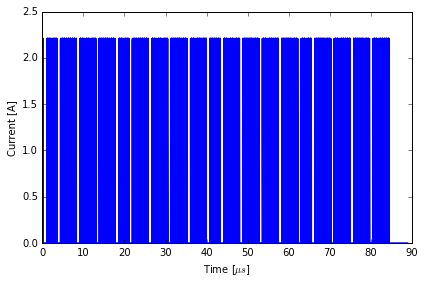

In [34]:
plt.figure('Beam current')
plt.clf()
plt.plot(machineParams.timeArray*1e6, machineParams.beamCurrent)
plt.xlabel('Time [$\\mu s$]')
plt.ylabel('Current [A]')
plt.tight_layout()

# Calculating the beam spectrum

## No input needed if the beam current was computed previously

In [35]:
machineParams.generateBeamSpectrum()

## Plotting the beam spectrum

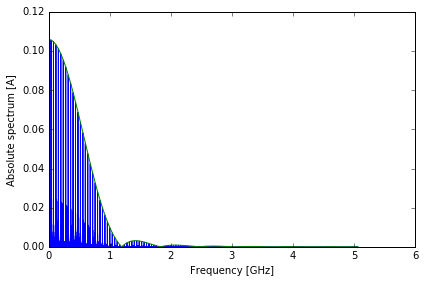

In [36]:
plt.figure('Beam spectrum')
plt.clf()
plt.plot(machineParams.freqArray/1e9, np.abs(machineParams.beamSpectrum))
plt.plot(machineParams.freqArray/1e9, np.abs(machineParams.analyticalSpectrum))
plt.xlabel('Frequency [GHz]')
plt.ylabel('Absolute spectrum [A]')
plt.tight_layout()

## Plotting the normalized power spectrum

In [ ]:
plt.figure('Normalized power spectrum')
plt.clf()
plt.plot(machineParams.freqArray/1e9, 10*np.log10(np.abs(machineParams.beamSpectrum)**2./np.max(np.abs(machineParams.beamSpectrum)**2.)))
plt.plot(machineParams.freqArray/1e9, 10*np.log10(np.abs(machineParams.analyticalSpectrum)**2./np.max(np.abs(machineParams.beamSpectrum)**2.)))
plt.xlabel('Frequency [GHz]')
plt.ylabel('Normalized power spectrum [dB]')
plt.tight_layout()

# Adding an impedance source

## Importing an impedance source or a full impedance model

In [37]:
impedanceDirectory = '../SPS_impedance'

## Generating the impedance object

In [38]:
impedParams = ImpedanceParameters(impedanceDirectory, machineParams)

## Importing resonators (R,f,Q)

In [39]:
impedParams.addResonators([360.5, 29.7119e3], [149e6, 781e6], [1119, 2198])

## Plotting the impedance on top of spectrum

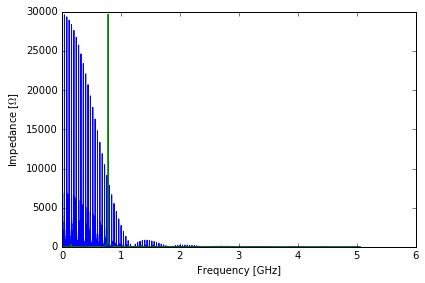

In [40]:
plt.figure('Impedance')
plt.clf()
plt.plot(machineParams.freqArray/1e9, np.abs(machineParams.beamSpectrum)/np.max(np.abs(machineParams.beamSpectrum))*np.max(np.abs(impedParams.impedance)))
plt.plot(impedParams.freqArray/1e9, np.abs(impedParams.impedance))
plt.xlabel('Frequency [GHz]')
plt.ylabel('Impedance [$\\Omega$]')
plt.tight_layout()

# Calculating the induced votlage

## Calculating the induced voltage, requires the beam current and impedance sources to be set

In [41]:
impedParams.inducedVoltageGeneration()

## Plotting the induced voltage on top of current

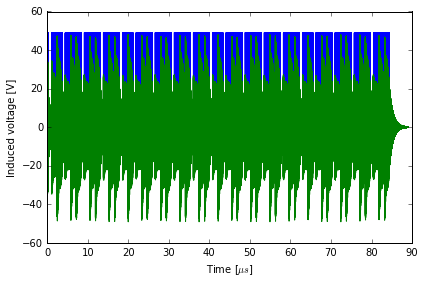

In [42]:
plt.figure('Induced Voltage')
plt.clf()
plt.plot(machineParams.timeArray*1e6, machineParams.beamCurrent/np.max(machineParams.beamCurrent)*np.max(np.abs(impedParams.inducedVoltage)))
plt.plot(impedParams.timeArray*1e6, impedParams.inducedVoltage)
plt.xlabel('Time [$\\mu s$]')
plt.ylabel('Induced voltage [V]')
plt.tight_layout()

# Calculating the RF losses

## Using the induced voltage to compute various things

In [43]:
impedParams.getRFLosses()

In [44]:
print('-- Energy loss per turn: \n- Time: %.2e [eV]\n- Freq: %.2e [eV]\n' 
      %(impedParams.energyLossTime, impedParams.energyLossFreq))

print('-- Energy loss per turn: \n- Time: %.2e [J]\n- Freq: %.2e [J]\n' 
      %(impedParams.energyLossTime*e, impedParams.energyLossFreq*e))

print('-- Power loss averaged on turn: \n- Time: %.2e [W]\n- Freq: %.2e [W]\n' 
      %(impedParams.powerLossTime, impedParams.powerLossTime))

-- Energy loss per turn: 
- Time: -4.33e+12 [eV]
- Freq: -4.33e+12 [eV]

-- Energy loss per turn: 
- Time: -6.93e-07 [J]
- Freq: -6.93e-07 [J]

-- Power loss averaged on turn: 
- Time: -7.80e-03 [W]
- Freq: -7.80e-03 [W]

